<a href="https://colab.research.google.com/github/RK-05/Freelance/blob/main/Eda_nlp_merging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***EDA***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
dd = pd.read_csv('/content/100345_dirty_data.csv')
dd.drop('Unnamed: 0',inplace=True,axis=1)

In [ ]:
dd

ID                   Latlng Title  ...  Education        Sector  Salary
0     ID5173001  [-37.716412 145.141221]    Mr  ...          1       Finance  4459.0
1     ID7480236  [-37.676334 145.029623]    Dr  ...          1  Data Science  2740.0
2     ID5134169  [-37.694711 145.076598]   Mrs  ...          0       Finance  3035.0
3     ID3649152  [-37.806727 145.081786]    Mr  ...          1            IT  2524.0
4     ID7507958  [-37.982876 145.217315]   NaN  ...          1  Data Science  4556.0
...         ...                      ...   ...  ...        ...           ...     ...
2905  ID7270421  [-37.687552 145.073558]    Mr  ...          0  Data Science  2263.0
2906  ID5444327  [-37.836913 145.094352]    Mr  ...          1       Finance  3084.0
2907  ID3890186  [-37.807502 145.055251]    Dr  ...          1            IT  3952.0
2908  ID3149913  [-37.960321 145.045615]   Mrs  ...          0            IT  4523.0
2909  ID3897627  [-37.894449 145.000979]    Mr  ...          1            IT  1017.0

[2910 rows x 10 columns]

In [ ]:
dd.isnull().sum()

ID                       0
Latlng                   0
Title                   33
Age                      0
Gender                  33
Work_experience          0
Last_employment_date     0
Education                0
Sector                  33
Salary                  33
dtype: int64

In [ ]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2910 entries, 0 to 2909
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    2910 non-null   object 
 1   Latlng                2910 non-null   object 
 2   Title                 2877 non-null   object 
 3   Age                   2910 non-null   int64  
 4   Gender                2877 non-null   float64
 5   Work_experience       2910 non-null   int64  
 6   Last_employment_date  2910 non-null   object 
 7   Education             2910 non-null   int64  
 8   Sector                2877 non-null   object 
 9   Salary                2877 non-null   float64
dtypes: float64(2), int64(3), object(5)
memory usage: 227.5+ KB


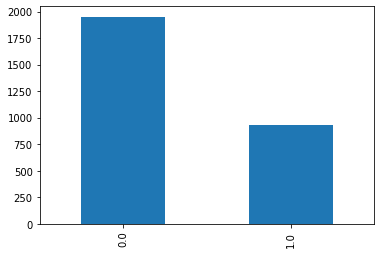

In [ ]:
dd['Gender'].value_counts().plot.bar()

In [ ]:
dd[dd['Gender'].isnull()]['Title'].value_counts()

Mr     19
Mrs     8
Dr      6
Name: Title, dtype: int64

In [ ]:
for i in dd.index:
  if dd['Title'][i]=='Mr':
    dd['Gender'][i]=0
  elif dd['Title'][i]=='Mrs':
    dd['Gender'][i]=1
  else:
    pass

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
dd.groupby('Gender')['Work_experience'].max()

Gender
0.0    29
1.0    29
Name: Work_experience, dtype: int64

In [ ]:
pd.crosstab(dd['Gender'],dd['Sector'])

Sector  Data Science  Financ  Finance   IT  iT
Gender                                        
0.0              563       4      576  773   7
1.0              268       2      280  391   7

In [ ]:
dd[dd['Gender'].isnull()]

ID                   Latlng Title  ...  Education        Sector  Salary
110   ID7320693  [-37.765371 145.001436]    Dr  ...          1  Data Science  2946.0
189   ID3989079  [-37.894482 144.992601]    Dr  ...          1            IT  3120.0
2159  ID3543463  [-37.678718 145.117566]    Dr  ...          1            IT  2704.0
2187  ID7694872  [-37.790123 145.322863]    Dr  ...          1  Data Science  3131.0
2219  ID3449676  [-37.773543 144.953433]    Dr  ...          1            IT  4869.0
2279  ID3260060  [-37.861594 145.260621]    Dr  ...          1            IT  8950.0

[6 rows x 10 columns]

In [ ]:
dd['Gender'].fillna(dd['Gender'].mode().values[0],inplace=True)

In [ ]:
dd['Gender'].isnull().sum()

0

In [ ]:
dd['Sector'].unique()

array(['Finance', 'Data Science', 'IT', nan, 'Financ', 'iT'], dtype=object)

In [ ]:
dd['Sector'] = dd['Sector'].map(lambda x: 'Finance' if x=='Financ' else ('IT' if x== 'iT' else x))

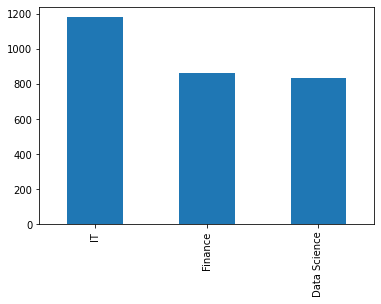

In [ ]:
dd['Sector'].value_counts().plot.bar()

In [ ]:
dd['Title'].unique()

array(['Mr', 'Dr', 'Mrs', nan], dtype=object)

In [ ]:
dd.groupby('Title')['Age','Work_experience','Salary'].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Age  Work_experience       Salary
Title                                         
Dr     35.784615         9.181538  3817.179012
Mr     35.154162         8.968933  3128.522335
Mrs    34.763593         8.758865  3244.612366

In [ ]:
pd.crosstab(dd['Title'],[dd['Education'],dd['Sector']])

Education            0                         1             
Sector    Data Science Finance   IT Data Science Finance   IT
Title                                                        
Dr                   0       1    1           96      91  132
Mr                 388     406  547          101     106  140
Mrs                191     199  278           43      53   71

In [ ]:
for i in dd[(dd['Education']==0) & (dd['Title'].isnull())].index:
  if dd['Gender'][i] == 1:
    dd['Title'][i] = 'Mrs'
  else:
    dd['Title'][i] = 'Mr'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
dd[(dd['Education']==1) & (dd['Sector']=='Data Science')]['Title'].value_counts()

Mr     101
Dr      96
Mrs     43
Name: Title, dtype: int64

In [ ]:
dd['Gender'].value_counts()

0.0    1950
1.0     960
Name: Gender, dtype: int64

In [ ]:
dd[(dd['Sector']=='Data Science') & (dd['Work_experience']>25)]['Title'].value_counts()

Mr     15
Mrs     3
Dr      2
Name: Title, dtype: int64

In [ ]:
dd[(dd['Sector']=='IT') & (dd['Work_experience']<10)]['Title'].value_counts()

Mr     497
Mrs    261
Dr      99
Name: Title, dtype: int64

In [ ]:
dd['Title'].fillna('Mr',inplace=True)

In [ ]:
dd.isnull().sum()

ID                       0
Latlng                   0
Title                    0
Age                      0
Gender                   0
Work_experience          0
Last_employment_date     0
Education                0
Sector                  33
Salary                  33
dtype: int64

In [ ]:
dd.groupby('Sector')['Age','Work_experience','Salary'].max()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Age  Work_experience   Salary
Sector                                     
Data Science   64               29  12416.0
Finance        64               29  10735.0
IT             64               29   9238.0

In [ ]:
pd.crosstab(dd['Education'],dd['Sector'])

Sector     Data Science  Finance   IT
Education                            
0                   587      610  834
1                   246      252  348

In [ ]:
pd.crosstab(dd['Work_experience'],dd['Sector'])

Sector           Data Science  Finance   IT
Work_experience                            
2                          27       35   59
3                          78       70  106
4                          62       79  122
5                          86       65  108
6                          75       87  116
7                          97       85  125
8                          80       85  105
9                          98       91  119
10                         15       13   26
11                         16       14   30
12                         27       28   19
13                         21       16   32
14                         22       23   25
15                         12       24   28
16                         20       15   28
17                         22       23   16
18                         13       17   24
19                         19       30   40
20                          2        7    5
21                          6        6    6
22                          3        6    5
23                          3        6    4
24                          5        4    6
25                          4        3    6
26                          6       11    2
27                          5        6    6
28                          6        6    8
29                          3        7    6

In [ ]:
dd[(dd['Sector'].isnull()) & (dd['Salary']>8000)]

ID                       Latlng Title  ...  Education  Sector  Salary
336  ID7808236  [-37.75680161 144.99086   ]    Dr  ...          1     NaN  8296.0
410  ID7890535      [-37.757357 144.95458 ]    Dr  ...          1     NaN  8790.0

[2 rows x 10 columns]

In [ ]:
dd['Sector'].fillna(dd['Sector'].mode().values[0],inplace=True)

In [ ]:
dd.corr()

Age    Gender  Work_experience  Education    Salary
Age              1.000000 -0.012848         0.810522   0.026656  0.776853
Gender          -0.012848  1.000000        -0.012847  -0.007571  0.030262
Work_experience  0.810522 -0.012847         1.000000   0.015693  0.961889
Education        0.026656 -0.007571         0.015693   1.000000  0.163028
Salary           0.776853  0.030262         0.961889   0.163028  1.000000

In [ ]:
dd[dd['Sector']=='IT'].corr()

Age    Gender  Work_experience  Education    Salary
Age              1.000000 -0.018439         0.806227   0.055199  0.794844
Gender          -0.018439  1.000000        -0.001415   0.003266  0.051610
Work_experience  0.806227 -0.001415         1.000000   0.027097  0.986520
Education        0.055199  0.003266         0.027097   1.000000  0.163031
Salary           0.794844  0.051610         0.986520   0.163031  1.000000

In [ ]:
dd[dd['Sector']=='Data Science'].corr()

Age    Gender  Work_experience  Education    Salary
Age              1.000000 -0.000518         0.806475   0.021118  0.784152
Gender          -0.000518  1.000000        -0.050666  -0.028985 -0.016318
Work_experience  0.806475 -0.050666         1.000000   0.052223  0.982465
Education        0.021118 -0.028985         0.052223   1.000000  0.224399
Salary           0.784152 -0.016318         0.982465   0.224399  1.000000

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
x = dd[['Age','Gender','Work_experience','Education','Salary']]
x

Age  Gender  Work_experience  Education  Salary
0      43     0.0               11          1  4459.0
1      31     0.0                5          1  2740.0
2      33     1.0                8          0  3035.0
3      27     0.0                7          1  2524.0
4      29     1.0                9          1  4556.0
...   ...     ...              ...        ...     ...
2905   27     0.0                6          0  2263.0
2906   33     0.0                7          1  3084.0
2907   49     0.0               12          1  3952.0
2908   58     1.0               15          0  4523.0
2909   26     0.0                2          1  1017.0

[2910 rows x 5 columns]

In [ ]:
imputer = KNNImputer(n_neighbors=5)
df = imputer.fit_transform(x)

In [ ]:
for i in dd[dd['Salary'].isnull()].index:
  dd['Salary'][i]=(df[i][4])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dd.isnull().sum()

ID                      0
Latlng                  0
Title                   0
Age                     0
Gender                  0
Work_experience         0
Last_employment_date    0
Education               0
Sector                  0
Salary                  0
dtype: int64

In [ ]:
dd.to_csv('100345_dirty_data_solution.csv')

# ***NLP***

In [ ]:
id=[]
t_=[]
tweet=[]
tt=''
with open('/content/1100345_tweets.txt') as fh: 
    for loop,line in enumerate(fh):
      if 'ID::' in line or 'IDD::' in line:
        if loop==0:id.append(line.split('ID::')[1].strip())
        else:tweet.append([tt.split('TWEET::')[1],id[-1]])
        try:
          id.append(line.split('ID::')[1].strip())
        except:
          id.append(line.split('IDD::')[1].strip())
      else:
        if 'TWEET::' in line:
          if loop==1 :
            tweet.append([line.split('TWEET::')[1],id[-1]])
            tt=line
          else:
            tt=line
        else:
          tt+=line
        

In [ ]:
tweet[1:]

[['@AndLester @colinrtalbot I can’t find where the 9,000 is coming from? Figures have been in region of 2,500 for last few weeks. https://t.co/y3gAroUpvj\n',
  'ID3391357'],
 ['@Mamaleh3 Here they are in Virginia today. They have a whole lake and they must congregate in a tight group. \n\n#SocialDistancing #coronavirus #trumpanzeesaredumb https://t.co/3Xr5hLQErR\n',
  'ID3958540'],
 ['Coronavirus: Cannes, Sundance, other film festivals unite for global streaming event - [Coronavirus], Source: Al Arabiya - https://t.co/Gy60yCZMCy https://t.co/L5LC8xNTSl\n',
  'ID5661201'],
 ['@CecyPotharst @DeAnna4Congress @realDonaldTrump its...its literally a fact dummy😂😂\n\n12k died from Obama and Biden handling H1N1\n\n70k from Trump Handling Covid \n\nhttps://t.co/3lamBXOxmq\n',
  'ID3387865'],
 ['@nytimes The Novel Coronavirus has a hook with which it attaches to the mucus membrane. Hydroxychloroquine disables the DNA chain of the hook. People either don’t get the Disease or get better. Why would 

In [ ]:
id_=[]
for i in id:
  if i not in id_:
    id_.append(i)
len(id_)

2595

In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 3.8MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
score=[]
sid_obj = SentimentIntensityAnalyzer()   

In [ ]:
tweets=[]
score=[]
for i in id_:
  twt=[]
  a=0
  for j in tweet[1:]:
    if i==j[-1]:
      twt.append(j[0])
      sentiment_dict = sid_obj.polarity_scores(j[0]) 
      if sentiment_dict['compound'] >= 0.05 :
        a+=1
  tweets.append(twt)
  score.append([i,a])

In [ ]:
list_t=[]
for i in range(len(tweets)):
  dictr={}
  dictr['ID']=id[i]
  dictr['Tweets']=tweets[i]
  list_t.append(dictr)

In [ ]:
list_t

[{'ID': 'ID3391357',
  'Tweets': ['@AndLester @colinrtalbot I can’t find where the 9,000 is coming from? Figures have been in region of 2,500 for last few weeks. https://t.co/y3gAroUpvj\n',
   'GPs press Hancock for clear testing strategy to avoid second wave of coronavirus | World news | The Guardian https://t.co/m1HQwBhMxu\n',
   "@DavidLammy Who cares? The EU scheme has failed to deliver. There are more important things to focus on than why we didn't participate in a failed scheme!\nhttps://t.co/VT3bWP2d7P\n",
   'Absolutely #despicable https://t.co/YfJi6Xri0E\n',
   'One of Every 10 COVID-19 Patients with Diabetes Die Within a Week of Hospitalisation: Study | The Weather Channel - The Weather Channel https://t.co/TQxfBSDNmw #diabetes #vingscommunity #news\n',
   'With 126 COVID-19 patients, Hyderabad hosts most local transmission cases in Pakistan\n#CoronaVirusPakistan #StayAtHome\n#QuarantineLife\n\nhttps://t.co/3tfWJT27ny\n',
   'In the face of the #Covid19 pandemic, we must put 

In [ ]:
with open('tweets.json', 'w') as f:
    for item in list_t[1:]:
        f.write("%s\n" % item)

In [ ]:
import json  
     
with open("tweets1.json", "w") as outfile:  
    json.dump(list_t[1:], outfile) 

In [ ]:
score

[['ID3391357', 4],
 ['ID3958540', 11],
 ['ID5661201', 10],
 ['ID3387865', 8],
 ['ID5989789', 7],
 ['ID5398255', 10],
 ['ID5375452', 15],
 ['ID7925437', 3],
 ['ID3722874', 4],
 ['ID5910672', 7],
 ['ID5615218', 13],
 ['ID5845027', 12],
 ['ID5220744', 7],
 ['ID5960970', 7],
 ['ID5381526', 8],
 ['ID5678140', 7],
 ['ID3944124', 13],
 ['ID5880980', 4],
 ['ID7935515', 14],
 ['ID3942110', 14],
 ['ID7320928', 13],
 ['ID3771491', 12],
 ['ID5395536', 5],
 ['ID5512369', 6],
 ['ID3234837', 7],
 ['ID5980690', 5],
 ['ID3857254', 5],
 ['ID5459085', 7],
 ['ID3214663', 8],
 ['ID5956434', 6],
 ['ID7722402', 13],
 ['ID3839952', 12],
 ['ID7474475', 5],
 ['ID7894885', 6],
 ['ID5904020', 8],
 ['ID3640934', 10],
 ['ID3790648', 3],
 ['ID7153296', 11],
 ['ID3286528', 5],
 ['ID3713096', 5],
 ['ID3303126', 8],
 ['ID5239744', 11],
 ['ID5142659', 18],
 ['ID3697831', 7],
 ['ID7447345', 8],
 ['ID3587703', 12],
 ['ID3737011', 9],
 ['ID7889994', 16],
 ['ID7971395', 6],
 ['ID3578954', 10],
 ['ID5163615', 10],
 ['ID37612

In [ ]:
df = pd.read_csv('100345_dirty_data_solution.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)

In [ ]:
pve=[]
for i in range(len(df)):
  for j in score:
    if df['ID'][i]==j[0]:
      pve.append(j[1])


In [ ]:
len(pve)

2612

In [ ]:
ss=pd.DataFrame(score)
ss

0   1
0     ID3391357   4
1     ID3958540  11
2     ID5661201  10
3     ID3387865   8
4     ID5989789   7
...         ...  ..
2590  ID5435512   8
2591  ID7277224   5
2592  ID7149408   3
2593  ID5153886   4
2594  ID3452675   3

[2595 rows x 2 columns]

In [ ]:
df1 = df.merge(ss,how='left',left_on='ID',right_on=0)

In [ ]:
df1.drop(0,axis=1,inplace=True)

In [ ]:
df1[1].fillna(0,inplace=True)

In [ ]:
df1.rename(columns={1:'Positive_tweets_no'},inplace=True)

In [ ]:
df1

ID                   Latlng  ...  Salary  Positive_tweets_no
0     ID5173001  [-37.716412 145.141221]  ...  4459.0                10.0
1     ID7480236  [-37.676334 145.029623]  ...  2740.0                11.0
2     ID5134169  [-37.694711 145.076598]  ...  3035.0                 5.0
3     ID3649152  [-37.806727 145.081786]  ...  2524.0                 9.0
4     ID7507958  [-37.982876 145.217315]  ...  4556.0                 7.0
...         ...                      ...  ...     ...                 ...
2905  ID7270421  [-37.687552 145.073558]  ...  2263.0                 9.0
2906  ID5444327  [-37.836913 145.094352]  ...  3084.0                10.0
2907  ID3890186  [-37.807502 145.055251]  ...  3952.0                15.0
2908  ID3149913  [-37.960321 145.045615]  ...  4523.0                17.0
2909  ID3897627  [-37.894449 145.000979]  ...  1017.0                 5.0

[2910 rows x 11 columns]

In [ ]:
ss['tweets']=tweets
ss1 = ss.merge(df1,how='inner',left_on=0,right_on='ID')

In [ ]:
ss1['tweets'] = ss1['tweets'].apply(lambda x:' '.join(x))
ss1

0   1  ...   Salary Positive_tweets_no
0     ID3391357   4  ...   1618.0                4.0
1     ID3958540  11  ...   4859.0               11.0
2     ID5661201  10  ...   5516.0               10.0
3     ID3387865   8  ...   2111.0                8.0
4     ID5989789   7  ...   4781.0                7.0
...         ...  ..  ...      ...                ...
2607  ID5435512   8  ...   1641.0                8.0
2608  ID7277224   5  ...   5029.0                5.0
2609  ID7149408   3  ...  11849.0                3.0
2610  ID5153886   4  ...   2339.0                4.0
2611  ID3452675   3  ...   5020.0                3.0

[2612 rows x 14 columns]

In [ ]:
import re
trst = ss1['tweets'].apply(lambda x: re.findall("[a-zA-z]+(?:[-'][a-zA-z]+)?",x))
trst

0       [AndLester, colinrtalbot, I, can, t, find, whe...
1       [Mamaleh, Here, they, are, in, Virginia, today...
2       [Coronavirus, Cannes, Sundance, other, film, f...
3       [CecyPotharst, DeAnna, Congress, realDonaldTru...
4       [nytimes, The, Novel, Coronavirus, has, a, hoo...
                              ...                        
2607    [African, e-commerce, firms, get, coronavirus,...
2608    [WHY, ISN, T, THIS, IN, HEAVY, MEDIA, ROTATION...
2609    [The, Chancellor, has, announced, the, extensi...
2610    [Covid, StrongerTogether, StrongerTogether, ht...
2611    [y, all, turned, black, people, disproportiona...
Name: tweets, Length: 2612, dtype: object

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stemmer_p=PorterStemmer()

In [ ]:
def preprocess_clean(list_words):
    tweet_updated1=[term.lower() for term in list_words \
                  if term.lower() not in stop_words and len(term)>3]
    tweet_stem=[stemmer_p.stem(word) for word in tweet_updated1]
    res=" ".join(tweet_stem)
    return res

In [ ]:
cln_twt = trst.map(lambda x:preprocess_clean(x))

In [ ]:
ss1['clean_twt']=cln_twt

In [ ]:
xt=[]
for i in ss1['Sector'].unique():
  ds = ' '.join(ss1[ss1['Sector']==i]['clean_twt'])
  ser=(pd.Series(ds.split())).value_counts().sort_values(ascending=False).head(100)
  lis=[]
  for j in range(100):
    lis.append(((ser.index[j]),(ser[j])))
  xt.append((i,lis))


In [ ]:
xt

[('IT',
  [('http', 24750),
   ('covid', 11692),
   ('coronaviru', 9008),
   ('peopl', 1966),
   ('case', 1734),
   ('pandem', 1592),
   ('death', 1454),
   ('test', 1413),
   ('time', 1217),
   ('lockdown', 1189),
   ('news', 1110),
   ('like', 1074),
   ('need', 1021),
   ('help', 986),
   ('trump', 974),
   ('work', 922),
   ('world', 893),
   ('home', 891),
   ('health', 849),
   ('live', 846),
   ('viru', 791),
   ('state', 790),
   ('countri', 774),
   ('report', 747),
   ('take', 744),
   ('make', 735),
   ('govern', 735),
   ('china', 697),
   ('say', 694),
   ('crisi', 691),
   ('know', 681),
   ('would', 639),
   ('patient', 628),
   ('support', 618),
   ('india', 617),
   ('pleas', 612),
   ('spread', 609),
   ('thank', 605),
   ('posit', 597),
   ('stay', 596),
   ('fight', 589),
   ('care', 589),
   ('mani', 586),
   ('respons', 565),
   ('could', 565),
   ('good', 564),
   ('number', 563),
   ('hospit', 550),
   ('even', 529),
   ('busi', 528),
   ('want', 524),
   ('come

In [ ]:
with open("100345_100uni.txt", 'w') as output:
    for row in xt:
        output.write(str(row) + '\n')

# ***Merging***

In [ ]:
!pip install tabula-py


     |████████████████████████████████| 11.7MB 3.5MB/s 


In [ ]:
import tabula
df = tabula.read_pdf("/content/InvoiceSimple-PDF-Template.pdf", pages='all')
tabula.convert_into("shopingcenters.pdf", "shopingcenters.csv", output_format="csv", pages='all')

ModuleNotFoundError: ignored

In [ ]:
df = pd.read_csv('shopingcenters.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.dtypes

sc_id    object
lat      object
lng      object
dtype: object

In [ ]:
!pip install haversine

In [ ]:
from haversine import haversine, Unit

lyon = (45.7597, 4.8422) # (lat, lon)
paris = (48.8567, 2.3508)

haversine(paris, lyon)


392.2172595594006

In [ ]:
len(df1)

2910

In [ ]:
sc_id=[]
sc_dis=[]
for i in range(len(df1)):
  sc_=[]
  p1 = ((float(re.findall('\d{1,4}.\d{1,10}',df1['Latlng'][i])[0])),float(re.findall('\d{1,4}.\d{1,10}',df1['Latlng'][i])[1]))
  for j in range(len(df)):
    try:
      p2 = (float(df['lat'][j]),float(df['lng'][j]))
    except:
      pass
    sc_.append(haversine(p1, p2))
  sc_id.append((df['sc_id'][sc_.index(min(sc_))]))
  sc_dis.append(min(sc_))

In [ ]:
df1['Shopping_center_id'] = sc_id
df1['Distance_to_sc'] = sc_dis

In [ ]:
df1

ID                   Latlng  ... Shopping_center_id  Distance_to_sc
0     ID5173001  [-37.716412 145.141221]  ...             SC_086     7905.901090
1     ID7480236  [-37.676334 145.029623]  ...             SC_086     7900.329327
2     ID5134169  [-37.694711 145.076598]  ...             SC_086     7902.839251
3     ID3649152  [-37.806727 145.081786]  ...             SC_086     7915.263150
4     ID7507958  [-37.982876 145.217315]  ...             SC_086     7936.111991
...         ...                      ...  ...                ...             ...
2905  ID7270421  [-37.687552 145.073558]  ...             SC_086     7902.017458
2906  ID5444327  [-37.836913 145.094352]  ...             SC_086     7918.725514
2907  ID3890186  [-37.807502 145.055251]  ...             SC_086     7915.077504
2908  ID3149913  [-37.960321 145.045615]  ...             SC_086     7931.857346
2909  ID3897627  [-37.894449 145.000979]  ...             SC_086     7924.129297

[2910 rows x 13 columns]

In [ ]:
!unzip '/content/google_transit (1).zip' -d '/content/1'

Archive:  /content/google_transit (1).zip
replace /content/1/agency.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/1/agency.txt   
replace /content/1/routes.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/1/routes.txt   
replace /content/1/trips.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/1/trips.txt    
replace /content/1/stops.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/1/stops.txt    
replace /content/1/calendar.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/1/calendar.txt  
replace /content/1/calendar_dates.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/1/calendar_dates.txt  
replace /content/1/shapes.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/1/shapes.txt   
replace /content/1/stop_times.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/1/stop_times.txt  


In [ ]:
s1=pd.read_csv('/content/stops.txt')
s2=pd.read_csv('/content/1/stops.txt')
s3=pd.read_csv('/content/2/stops.txt')
s4=pd.read_csv('/content/3/stops.txt')
s5=pd.read_csv('/content/4/stops.txt')


In [ ]:
s1

stop_id  ...    stop_lon
0    23173  ...  144.952815
1    45511  ...  144.850805
2    45513  ...  144.848823
3    48578  ...  144.849201

[4 rows x 4 columns]

In [ ]:
stp = pd.concat([s1,s2,s5],ignore_index=True)

In [ ]:
stp

stop_id  ...    stop_lon
0       23173  ...  144.952815
1       45511  ...  144.850805
2       45513  ...  144.848823
3       48578  ...  144.849201
4       10002  ...  144.595789
...       ...  ...         ...
7054    52118  ...  143.849407
7055      536  ...  143.720646
7056     6285  ...  145.967323
7057     7009  ...  143.663226
7058       82  ...  143.858761

[7059 rows x 4 columns]

In [ ]:
from tqdm import tqdm
stp_id=[]
stp_dis=[]
for i in tqdm(range(len(df1))):
  sc_=[]
  p1 = ((float(re.findall('\d{1,4}.\d{1,10}',df1['Latlng'][i])[0])),float(re.findall('\d{1,4}.\d{1,10}',df1['Latlng'][i])[1]))
  for j in range(len(stp)):
      p2 = (float(stp['stop_lat'][j]),float(stp['stop_lon'][j]))
      sc_.append(haversine(p1, p2))
  stp_id.append((stp['stop_id'][sc_.index(min(sc_))]))
  stp_dis.append(min(sc_))

100%|██████████| 2910/2910 [05:17<00:00,  9.16it/s]


In [ ]:
df1['Train_station_id'] = stp_id
df1['Distance_to_train_station'] = stp_dis